In [ ]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from tabulate import tabulate
from tqdm import tqdm

In [2]:
df=pd.read_csv('dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,atomic_number,radius_pm,oxid_state,relativistic,metal_amount_mmol,num of group,spcaer,...,aromaticity1,sol1_vol_mL,protic2,polarity index 2,aromaticity2,solv2_vol_mL,time_min,temp_c,size_nm,g_factor*10^4
0,0,0,0,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,3.060000,0.000000
1,1,1,1,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.104117,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,1.000000,0.757989
2,2,2,2,-1.03686,-0.252283,-0.853143,-1.110555,1.601355,0.049297,-0.526910,...,-0.070711,-0.175747,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,1.000000,0.583069
3,3,3,3,-1.03686,-0.252283,-0.853143,-1.110555,1.768534,-0.280991,-0.526910,...,-0.070711,-0.032487,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,2.370000,0.000000
4,4,4,4,0.90070,-0.626518,0.980887,0.900450,-0.454943,0.049297,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,4.000000,15.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-1.03686,-0.252283,-0.853143,-1.110555,-0.265474,-0.115847,-0.742392,...,-0.070711,-0.605526,-0.537086,-0.793018,-0.240613,-0.523310,0.217328,-0.176375,2.066667,2.000000
197,197,197,197,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,15.000000
198,198,198,198,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.300000,10.000000
199,199,199,199,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,7.000000


In [3]:
input_col=[col for col in df.columns]
input_col.remove('Unnamed: 0')
input_col.remove('Unnamed: 0.1')
input_col.remove('Unnamed: 0.2')
input_col.remove('g_factor*10^4')
input_col

['atomic_number',
 'radius_pm',
 'oxid_state',
 'relativistic',
 'metal_amount_mmol',
 'num of group',
 'spcaer',
 'anchoring_group',
 'chirality type',
 'hydrogen bond',
 'aromaticity',
 'ligand_amount_mmol',
 'redu_num',
 'reductant_amount_mmol',
 'protic1',
 'polarity index1',
 'aromaticity1',
 'sol1_vol_mL',
 'protic2',
 'polarity index 2',
 'aromaticity2',
 'solv2_vol_mL',
 'time_min',
 'temp_c',
 'size_nm']

In [4]:
#individual output:

X = df[input_col]

Y = df['g_factor*10^4']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)


## Optimizing size model


### 1. Extra Trees

In [5]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [04:52<00:00, 12.17s/it]

0.7197933318387097 2 7 4


In [27]:
ET_regr = ExtraTreesRegressor(n_estimators=2,
                                            max_features=7,
                                            random_state=4)

ET_regr.fit(X_train, np.ravel(Y_train))
ET_Y_pred = ET_regr.predict(X_test)

ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
ET_r2 = r2_score(Y_test, ET_Y_pred)
mse = mean_squared_error(Y_test, ET_Y_pred)
# rmse = mean_squared_error(Y_test, ET_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", ET_r_2, ET_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.925543               0.719793               1.52171


In [56]:

# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = ET_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['AB_Y_pred'] = ET_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Extra_Tree_predictions.csv', index=False)
print("预测结果已保存到 Extra_Tree_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Extra_Tree'],
    'MAE': [ET_mae],
    'R2': [ET_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Extra_Tree_performance.csv', index=False)
print("性能指标已保存到 Extra_Tree_performance.csv")

预测结果已保存到 Extra_Tree_predictions.csv
性能指标已保存到 Extra_Tree_performance.csv


### 2. Decision Tree

In [7]:
min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 23):
        for k in range(4, 60, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, np.ravel(Y_train))
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [01:19<00:00,  2.73s/it]

0.731065238172043 12 5 38


In [30]:
DT_regr = DecisionTreeRegressor(max_depth=12,
                                max_features=5,
                                random_state=38)

DT_regr.fit(X_train, np.ravel(Y_train))
DT_Y_pred = DT_regr.predict(X_test)
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
DT_r2 = r2_score(Y_test, DT_Y_pred)
mse = mean_squared_error(Y_test, DT_Y_pred)
# rmse = mean_squared_error(Y_test, DT_Y_pred, squared=False)
d = [ ["g_factor", DT_r2, DT_mae, mse]]
# d = [ ["g_factor", r_2, mae, mse, rmse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.898214               0.731065               2.08024


In [57]:

# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = DT_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = DT_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Decision_Tree_predictions.csv', index=False)
print("预测结果已保存到 Decision_Tree_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Decision_Tree'],
    'MAE': [DT_mae],
    'R2': [DT_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Decision_Tree_performance.csv', index=False)
print("性能指标已保存到 Decision_Tree_performance.csv")

预测结果已保存到 Decision_Tree_predictions.csv
性能指标已保存到 Decision_Tree_performance.csv


### 3. Random Forest

In [9]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 23, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [05:03<00:00, 10.13s/it]

1.1128064587580646 18 1 19


In [29]:
RF_regr = RandomForestRegressor(max_depth=13,
                                            n_estimators=1,
                                            max_features=12,
                                            random_state=45)
RF_regr.fit(X_train, np.ravel(Y_train))
RF_Y_pred = RF_regr.predict(X_test)

RF_mae = mean_absolute_error(Y_test, RF_Y_pred)
RF_r2 = r2_score(Y_test, RF_Y_pred)
mse = mean_squared_error(Y_test, RF_Y_pred)
# rmse = mean_squared_error(Y_test, RF_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", RF_r2, RF_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.788354                 1.1968               4.32547


In [58]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = RF_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = RF_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Random_Tree_predictions.csv', index=False)
print("预测结果已保存到 Random_Tree_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['RAndom_Tree'],
    'MAE': [RF_mae],
    'R2': [RF_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Random_Forest_performance.csv', index=False)
print("性能指标已保存到 Random_Forest_performance.csv")

预测结果已保存到 Random_Tree_predictions.csv
性能指标已保存到 Random_Forest_performance.csv


### 4. K Neighbors

In [11]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i,
                                      p=j).fit(X_train, np.ravel(Y_train))

        KNN_Y_pred = KNN_reg.predict(X_test)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:06<00:00,  5.84it/s]

1.9434477870967741 1 1


In [31]:
KNN_reg = KNeighborsRegressor(n_neighbors=1,
                                      p=1).fit(X_train, np.ravel(Y_train))

KNN_Y_pred = KNN_reg.predict(X_test)
KNN_mae = mean_absolute_error(Y_test, KNN_Y_pred)

KNN_mae = mean_absolute_error(Y_test, KNN_Y_pred)
KNN_r2 = r2_score(Y_test, KNN_Y_pred)
mse = mean_squared_error(Y_test, KNN_Y_pred)
# rmse = mean_squared_error(Y_test, KNN_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", KNN_r2, KNN_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.226156                1.94345               15.8153


In [69]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = KNN_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = KNN_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('K_Neighbors_predictions.csv', index=False)
print("预测结果已保存到K_Neighbors_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['K_Neighbors'],
    'MAE': [KNN_mae],
    'R2': [KNN_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('K_Neighbors_performance.csv', index=False)
print("性能指标已保存到 K_Neighbors_performance.csv")

预测结果已保存到K_Neighbors_predictions.csv
性能指标已保存到 K_Neighbors_performance.csv


### 5.Bagging

In [13]:
min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 20)):
    for j in range(1, 20):
        for k in range(2, 36, 2):

            B_regr = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)

            B_regr.fit(X_train, np.ravel(Y_train))

            B_Y_pred = B_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, B_Y_pred)

            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k

print(min_mae, min_i, min_j, min_k)

100%|██████████| 19/19 [01:44<00:00,  5.52s/it]

1.3005988213225808 14 6 20


In [32]:
B_regr = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=14),
                                      n_estimators=6,
                                      random_state=20)

B_regr.fit(X_train, np.ravel(Y_train))
B_Y_pred = B_regr.predict(X_test)

B_mae = mean_absolute_error(Y_test, B_Y_pred)
B_r2 = r2_score(Y_test, B_Y_pred)
mse = mean_squared_error(Y_test, B_Y_pred)
# rmse = mean_squared_error(Y_test, B_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", B_r2, B_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.798836                 1.3006               4.11126


In [67]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = B_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = B_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Bagging_predictions.csv', index=False)
print("预测结果已保存到Bagging_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Bagging'],
    'MAE': [B_mae],
    'R2': [B_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Bagging_performance.csv', index=False)
print("性能指标已保存到 Bagging_performance.csv")

预测结果已保存到Bagging_predictions.csv
性能指标已保存到 Bagging_performance.csv


### 6.AdaBoosting

In [48]:
min_mae = 99999
min_i, min_j = 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        AB_regr = AdaBoostRegressor(n_estimators=i, loss='exponential', learning_rate=j)
        AB_regr.fit(X_train, np.ravel(Y_train))
        AB_Y_pred = AB_regr.predict(X_test)
        AB_mae = mean_absolute_error(Y_test, AB_Y_pred)
        if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
print(min_mae, min_i, min_j)

100%|██████████| 29/29 [00:14<00:00,  2.06it/s]

0.7197933318387097 1 1


In [52]:
AB_regr = AdaBoostRegressor(n_estimators=1, loss='exponential', learning_rate=1)

AB_regr.fit(X_train, np.ravel(Y_train))
AB_Y_pred = AB_regr.predict(X_test)
AB_mae = mean_absolute_error(Y_test, AB_Y_pred)

AB_mae = mean_absolute_error(Y_test, AB_Y_pred)
AB_r2 = r2_score(Y_test, AB_Y_pred)
mse = mean_squared_error(Y_test, AB_Y_pred)
# rmse = mean_squared_error(Y_test, AB_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", AB_r2, AB_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.454877                2.64161               11.1409


In [66]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = AB_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = AB_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('AdaBoosting_predictions.csv', index=False)
print("预测结果已保存到AdaBoosting_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['AdaBoosting'],
    'MAE': [AB_mae],
    'R2': [AB_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('AdaBoosting_performance.csv', index=False)
print("性能指标已保存到AdaBoosting_performance.csv")

预测结果已保存到AdaBoosting_predictions.csv
性能指标已保存到AdaBoosting_performance.csv



### 7.Gradient Boosting

In [17]:
min_mae = 999
min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
for i in tqdm(range(300, 450, 10)):
    for j in range(2, 30, 2):
        for k in np.arange(0.06, 0.22, 0.02):
            for l in range(2, 22, 2):
                GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
                GB_regr.fit(X_train, np.ravel(Y_train))
                GB_Y_pred = GB_regr.predict(X_test)

                mae = mean_absolute_error(Y_test, GB_Y_pred)
                if (min_mae > mae):
                    min_mae = mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(min_mae, min_i, min_j, min_k, min_l)

100%|██████████| 15/15 [1:52:05<00:00, 448.34s/it]

1.1316592592344736 300 8 0.12000000000000001 10


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

param_dist = {
    'n_estimators': range(300, 450, 10),
    'max_depth': range(2, 30, 2),
    'learning_rate': np.arange(0.06, 0.22, 0.02),
    'random_state': range(2, 22, 2)
}

GB_regr = GradientBoostingRegressor()

random_search = RandomizedSearchCV(
    GB_regr, 
    param_distributions=param_dist,
    n_iter=50,  # 随机尝试50组参数，远少于完整搜索
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,  # 使用所有CPU核心并行计算
    random_state=42
)

random_search.fit(X_train, np.ravel(Y_train))

# print("最佳参数:", random_search.best_params_)
# print("最佳MAE:", -random_search.best_score_)

# 使用最佳模型预测
best_GB = random_search.best_estimator_
GB_Y_pred = best_GB.predict(X_test)
GB_mae = mean_absolute_error(Y_test, GB_Y_pred)
GB_r2 = r2_score(Y_test, GB_Y_pred)
print("最佳模型MAE:", GB_mae)
print("最佳模型R2:", GB_r2)


最佳模型MAE: 1.5511306084356142
最佳模型R2: 0.6623611701009361


In [40]:
GB_regr = GradientBoostingRegressor(n_estimators=310, max_depth=8, learning_rate=0.06, random_state=10)
GB_regr.fit(X_train, np.ravel(Y_train))
GB_Y_pred = GB_regr.predict(X_test)

GB_mae = mean_absolute_error(Y_test, GB_Y_pred)
GB_r2 = r2_score(Y_test, GB_Y_pred) 
mse = mean_squared_error(Y_test, GB_Y_pred)
# rmse = mean_squared_error(Y_test, GB_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", r_2, mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.925543               0.719793               3.88097


In [65]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = GB_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = GB_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Gradient Boosting_predictions.csv', index=False)
print("预测结果已保存到Gradient Boosting_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Gradient Boosting'],
    'MAE': [GB_mae],
    'R2': [GB_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Gradient Boosting_performance.csv', index=False)
print("性能指标已保存到Gradient Boostingg_performance.csv")

预测结果已保存到Gradient Boosting_predictions.csv
性能指标已保存到Gradient Boostingg_performance.csv


### 8.Lasso

In [41]:
min_mae = 99999
min_i, min_j = 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        L_regr = Lasso(alpha=i, random_state=j)
        L_regr.fit(X_train, np.ravel(Y_train))
        L_Y_pred = L_regr.predict(X_test)
        L_mae = mean_absolute_error(Y_test, L_Y_pred)
        if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
print(min_mae, min_i, min_j)

100%|██████████| 29/29 [00:01<00:00, 17.83it/s]

0.7197933318387097 1 1


In [46]:
L_regr = Lasso(alpha=1, random_state=1)
L_regr.fit(X_train, np.ravel(Y_train))
L_Y_pred = L_regr.predict(X_test)

L_mae = mean_absolute_error(Y_test, L_Y_pred)
L_r2 = r2_score(Y_test, L_Y_pred)
mse = mean_squared_error(Y_test, L_Y_pred)
# rmse = mean_squared_error(Y_test, L_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", L_r2, L_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.214932                3.28747               16.0447


In [64]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = L_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = L_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Lasso_predictions.csv', index=False)
print("预测结果已保存到Lasso_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Lasso'],
    'MAE': [L_mae],
    'R2': [L_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Lasso_performance.csv', index=False)
print("性能指标已保存到Lasso_performance.csv")

预测结果已保存到Lasso_predictions.csv
性能指标已保存到Lasso_performance.csv


### Saving Best model

In [43]:
ET_regr = ExtraTreesRegressor(n_estimators=2,
                                            max_features=7,
                                            random_state=4)

ET_regr.fit(X_train, np.ravel(Y_train))
ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))
joblib.dump(ET_regr, "./model_SO_ExtraTrees.joblib")

['./model_SO_ExtraTrees.joblib']

## Analyzing

In [44]:
ET_regr = ExtraTreesRegressor(n_estimators=2,
                                            max_features=7,
                                            random_state=4)

ET_regr.fit(X_train, np.ravel(Y_train))
ET_Y_pred = ET_regr.predict(X_test)

mae = mean_absolute_error(Y_test, ET_Y_pred)
r_2 = r2_score(Y_test, ET_Y_pred)
mse = mean_squared_error(Y_test, ET_Y_pred)
# rmse = mean_squared_error(Y_test, ET_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", r_2, mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))

Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.925543               0.719793               1.52171


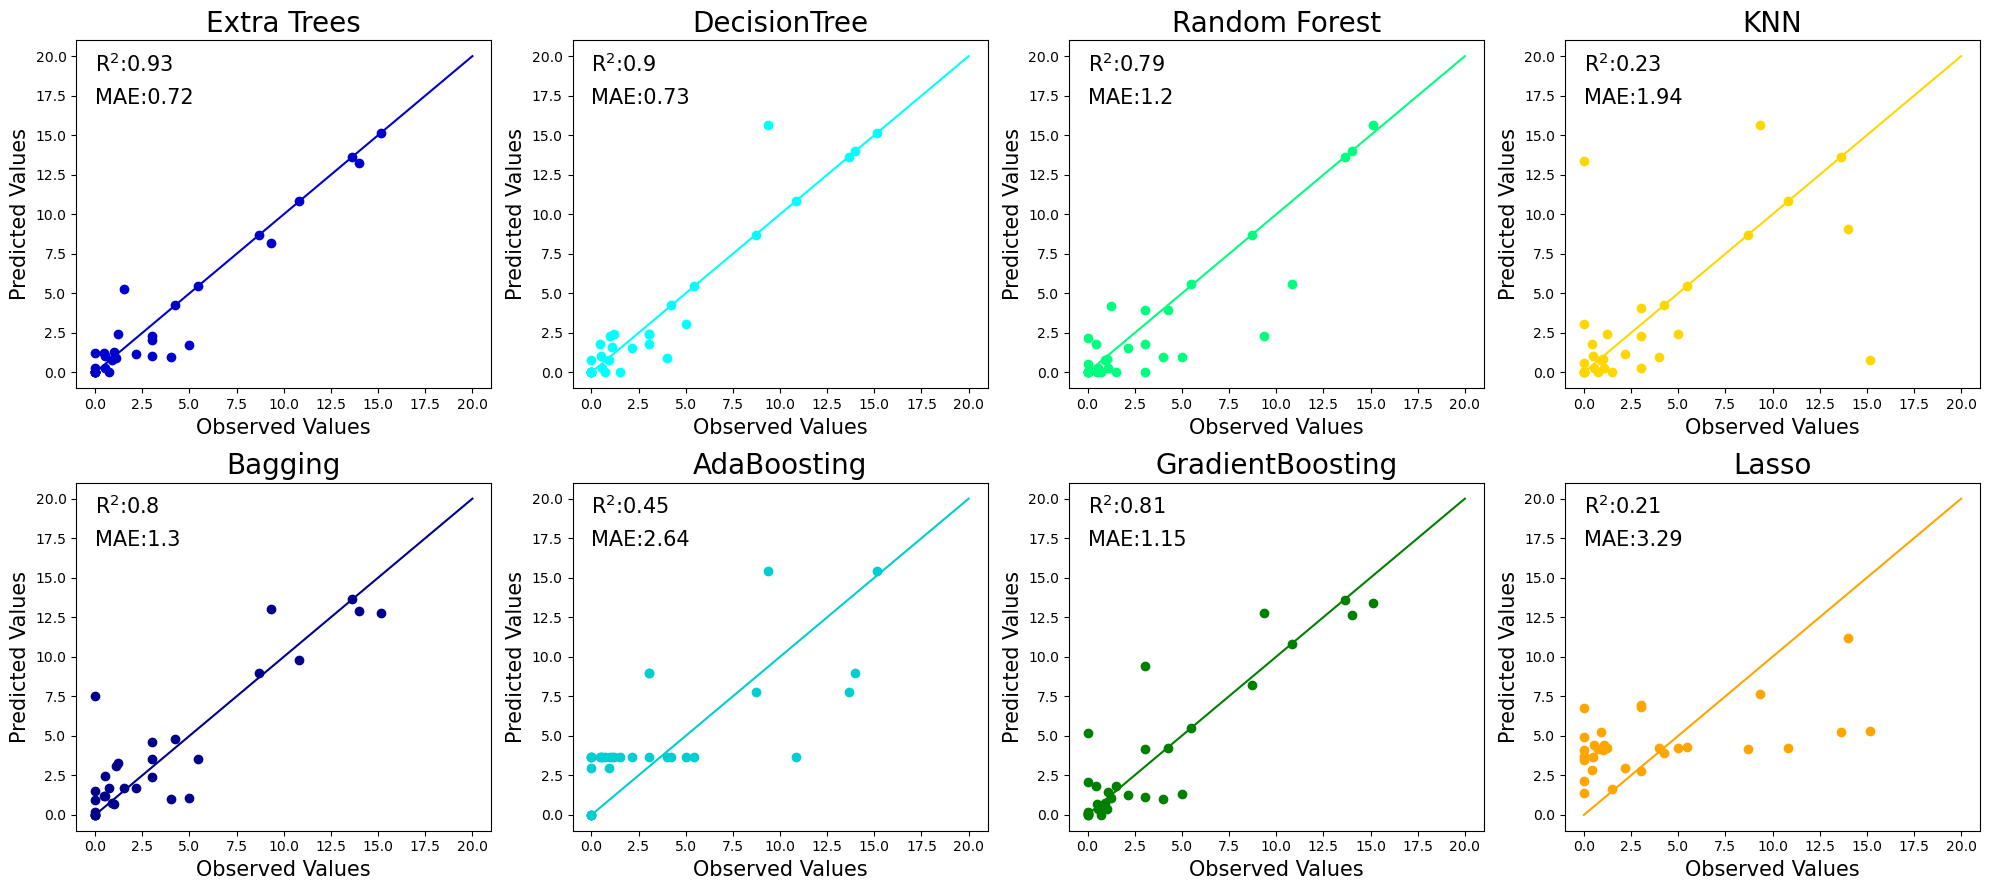

In [53]:
fig, ax = plt.subplots(2, 4, figsize=(20,9))

fontsize=15
x1,y1=0,19
x2,y2=0,17

ax[0,0].plot(Y_test,ET_Y_pred ,'o',color='mediumblue')
ax[0,0].plot([0,20],[0,20], color = 'mediumblue')
ax[0,0].set_title('Extra Trees',fontsize=20)
ax[0,0].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,0].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,0].text(x1,y1,"R$^{2}$:"+str(round(ET_r2,2)),fontsize=fontsize)
ax[0,0].text(x2,y2,"MAE:"+str(round(ET_mae,2)),fontsize=fontsize)

ax[0,1].plot(Y_test,DT_Y_pred ,'o',color='aqua')
ax[0,1].plot([0,20],[0,20], color = 'aqua')
ax[0,1].set_title('DecisionTree',fontsize=20)
ax[0,1].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,1].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,1].text(x1,y1,"R$^{2}$:"+str(round(DT_r2,2)),fontsize=fontsize)
ax[0,1].text(x2,y2,"MAE:"+str(round(DT_mae,2)),fontsize=fontsize)

ax[0,2].plot(Y_test,RF_Y_pred ,'o',color='springgreen')
ax[0,2].plot([0,20],[0,20], color = 'springgreen')
ax[0,2].set_title('Random Forest',fontsize=20)
ax[0,2].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,2].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,2].text(x1,y1,"R$^{2}$:"+str(round(RF_r2,2)),fontsize=fontsize)
ax[0,2].text(x2,y2,"MAE:"+str(round(RF_mae,2)),fontsize=fontsize)

ax[0,3].plot(Y_test,KNN_Y_pred ,'o',color='gold')
ax[0,3].plot([0,20],[0,20], color = 'gold')
ax[0,3].set_title('KNN',fontsize=20)
ax[0,3].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,3].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,3].text(x1,y1,"R$^{2}$:"+str(round(KNN_r2,2)),fontsize=fontsize)
ax[0,3].text(x2,y2,"MAE:"+str(round(KNN_mae,2)),fontsize=fontsize)

ax[1,0].plot(Y_test,B_Y_pred ,'o',color='darkblue')
ax[1,0].plot([0,20],[0,20], color = 'darkblue')
ax[1,0].set_title('Bagging',fontsize=20)
ax[1,0].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,0].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,0].text(x1,y1,"R$^{2}$:"+str(round(B_r2,2)),fontsize=fontsize)
ax[1,0].text(x2,y2,"MAE:"+str(round(B_mae,2)),fontsize=fontsize)

ax[1,1].plot(Y_test,AB_Y_pred ,'o',color='darkturquoise')
ax[1,1].plot([0,20],[0,20], color = 'darkturquoise')
ax[1,1].set_title('AdaBoosting',fontsize=20)
ax[1,1].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,1].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,1].text(x1,y1,"R$^{2}$:"+str(round(AB_r2,2)),fontsize=fontsize)
ax[1,1].text(x2,y2,"MAE:"+str(round(AB_mae,2)),fontsize=fontsize)

ax[1,2].plot(Y_test,GB_Y_pred ,'o',color='green')
ax[1,2].plot([0,20],[0,20], color = 'green')
ax[1,2].set_title('GradientBoosting',fontsize=20)
ax[1,2].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,2].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,2].text(x1,y1,"R$^{2}$:"+str(round(GB_r2,2)),fontsize=fontsize)
ax[1,2].text(x2,y2,"MAE:"+str(round(GB_mae,2)),fontsize=fontsize)

ax[1,3].plot(Y_test,L_Y_pred ,'o',color='orange')
ax[1,3].plot([0,20],[0,20], color = 'orange')
ax[1,3].set_title('Lasso',fontsize=20)
ax[1,3].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,3].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,3].text(x1,y1,"R$^{2}$:"+str(round(L_r2,2)),fontsize=fontsize)
ax[1,3].text(x2,y2,"MAE:"+str(round(L_mae,2)),fontsize=fontsize)

fig.tight_layout()
fig.savefig('ML_model.svg',format='svg',dpi=300)

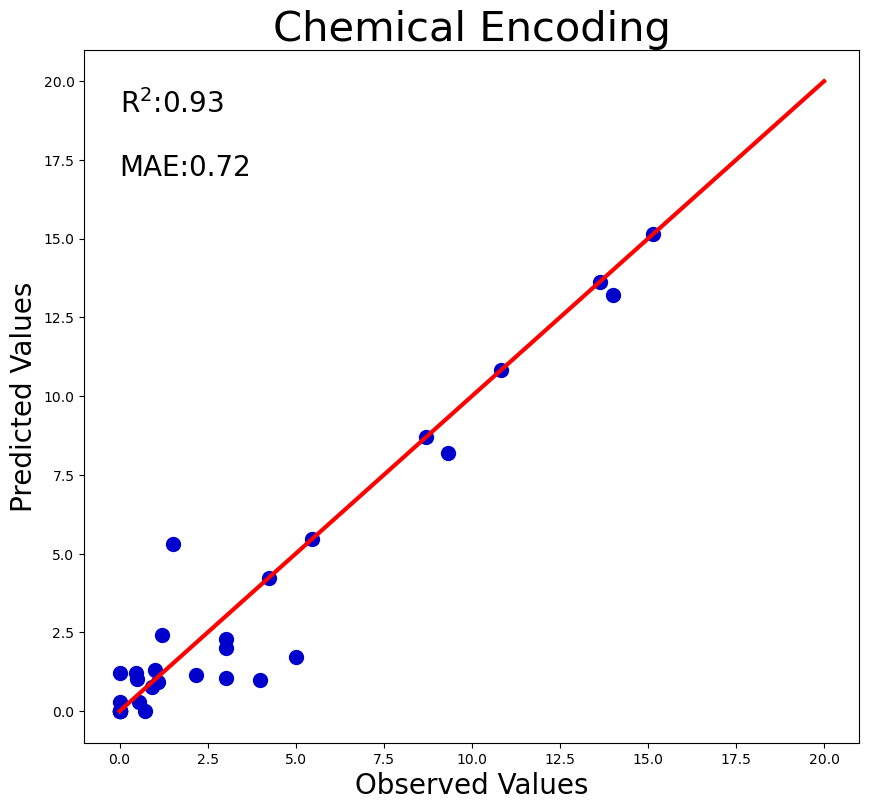

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))

fontsize=20
x1,y1=0,19
x2,y2=0,17

ax.plot(Y_test,ET_Y_pred ,'o',color='mediumblue',markersize=10)
ax.plot([0,20],[0,20], color = 'red',linewidth=3)
ax.set_title('Chemical Encoding',fontsize=30)
ax.set_xlabel('Observed Values',fontsize=fontsize)
ax.set_ylabel('Predicted Values',fontsize=fontsize)
ax.text(x1,y1,"R$^{2}$:0.93",fontsize=fontsize)
ax.text(x2,y2,"MAE:0.72",fontsize=fontsize)
fig.savefig('Chemical.svg',format='svg',dpi=300)